In [1]:
import pickle
import numpy as np
import lzma
import scipy.signal
import tensortools as tt
import pickle
import matplotlib.pyplot as plt

In [2]:
def add_gaussian_kernel(input_vector, kernel_size, sigma):

    # Define the Gaussian kernel
    kernel = scipy.signal.gaussian(kernel_size, sigma)
    
    # Initialize the result vector with zeros as floating-point numbers
    result_vector = np.zeros(len(input_vector), dtype=float)
    
    # Iterate through the input vector
    for i, value in enumerate(input_vector):
        if value == 1.0:
            # Add the Gaussian kernel to the result vector centered around the current index
            start_idx = max(0, i - (kernel_size // 2))
            end_idx = min(len(input_vector), i + (kernel_size // 2) + 1)
            result_vector[start_idx:end_idx] += kernel[
                (kernel_size // 2) - (i - start_idx) : (kernel_size // 2) + (end_idx - i)
            ]
    
    return result_vector

sigma_my = 1.0 / 0.025
kernel_size_my = int(sigma_my) * 5 * 2 + 1

def FiletoVec(name):
    with lzma.open("./savedoutput/" + name + ".xz", "rb") as fp:
        outsaved = pickle.load(fp)
    vec_space = 0.025
    spike_mat = np.zeros((len(outsaved), int(10000/vec_space)))
    for i in range(len(outsaved)):
        for n in range(len(outsaved[i])):
            j = int(outsaved[i][n]/vec_space)
            spike_mat[i, j] = 1
    return spike_mat

def FiletoVec_param(NetworkType, n, model_id, input_idx, MeanDelay, stdDelay, n_run):
    CellType = "point"
    name = str(NetworkType) + '_' + str(CellType) + '_layercount' + str(n) + '_model' + str(model_id) + '_input' + str(input_idx) + '_stddelay' + str(stdDelay) + '_meandelay' + str(MeanDelay) + '_nrun' + str(n_run)
    return FiletoVec(name)

def VecbyParm(NetworkType, n, model_id, input_idx, MeanDelay, ):
    vec_lst = []
    for stdDelay_noround in np.arange(0, 1.01, 0.05):
        stdDelay = np.round(stdDelay_noround,2)
        vec_lst.append(FiletoVec_param(NetworkType, n, model_id, input_idx, MeanDelay, stdDelay, 0))
    return np.stack(vec_lst)



def VecbyParm_withGaussian(NetworkType, n, model_id, input_idx, MeanDelay):
    noguas = VecbyParm(NetworkType, n, model_id, input_idx, MeanDelay)

    result_3d = np.apply_along_axis(add_gaussian_kernel, axis=2, arr=noguas, kernel_size = kernel_size_my, sigma = sigma_my)

    return result_3d
    

In [3]:
# vec_lst = VecbyParm_withGaussian('SmallWorld', 30, 0, 0, 2.8)
# # with open('data_spkden.pkl', 'rb') as file:
# #     vec_lst = pickle.load(file)
# vec_lst.shape

In [4]:
# vec_lst[0].shape

In [5]:
# # Fit an ensemble of models, 4 random replicates / optimization runs per model rank
# data = vec_lst
# ensemble = tt.Ensemble(fit_method="ncp_hals")
# ensemble.fit(data, ranks=range(1, 15), replicates=4)

# fig, axes = plt.subplots(1, 2)
# tt.plot_objective(ensemble, ax=axes[0])   # plot reconstruction error as a function of num components.
# tt.plot_similarity(ensemble, ax=axes[1])  # plot model similarity as a function of num components.
# fig.tight_layout()


In [6]:

# Plot the low-d factors for an example model, e.g. rank-2, first optimization run / replicate.
# num_components = 4
# replicate = 0
# tt.plot_factors(ensemble.factors(num_components)[replicate])  # plot the low-d factors

# plt.show()

In [7]:
# ensemble.factors(10)[0].factors[1].shape

In [8]:
# with open('my_object.pkl', 'wb') as f:
#     pickle.dump(ensemble, f)

In [9]:
vec_lst = VecbyParm_withGaussian('SmallWorld', 30, 0, 0, 2.0)
data = vec_lst
ensemble = tt.Ensemble(fit_method="cp_als")
ensemble.fit(data, ranks=range(1, 6), replicates=4)
with open('tca_ensemble_sm30-0-0-2.0.pkl', 'wb') as f:
    pickle.dump(ensemble, f)

Rank-1 models:  min obj, 0.92;  max obj, 0.92;  time to fit, 330.2s


Rank-2 models:  min obj, 0.90;  max obj, 0.90;  time to fit, 1360.3s


Rank-3 models:  min obj, 0.89;  max obj, 0.89;  time to fit, 1281.3s


Rank-4 models:  min obj, 0.87;  max obj, 0.87;  time to fit, 2095.5s


Rank-5 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 2067.6s


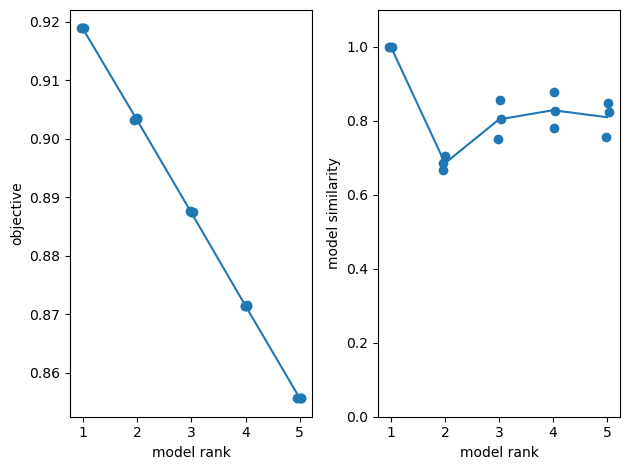

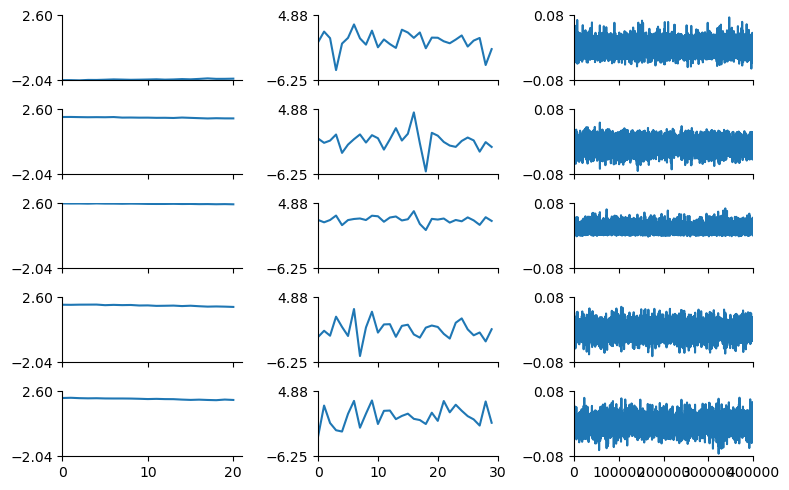

In [4]:
# Plotting the ensemble analysis results
with open('tca_ensemble_sm30-0-0-2.0.pkl', 'rb') as f:
    ensemble = pickle.load(f)


fig, axes = plt.subplots(1, 2)
tt.plot_objective(ensemble, ax=axes[0])  # plot reconstruction error as a function of num components
tt.plot_similarity(ensemble, ax=axes[1]) # plot model similarity as a function of num components
fig.tight_layout()

# Plot the low-dimensional factors for an example model
num_components = 5
replicate = 0

# Check if the factors method exists in ensemble
if hasattr(ensemble, 'factors'):
    factors = ensemble.factors(num_components)
    if replicate < len(factors):
        tt.plot_factors(factors[replicate])  # plot the low-dimensional factors
    else:
        print(f"No replicate {replicate} for num_components {num_components}")
else:
    print("The ensemble object does not have a 'factors' method.")

plt.show()


In [ ]:
vec_lst = VecbyParm_withGaussian('SmallWorld', 60, 0, 0, 2.8)
data = vec_lst
ensemble = tt.Ensemble(fit_method="cp_als")
ensemble.fit(data, ranks=range(1, 6), replicates=4)
with open('tca_ensemble_sm60-0-0-2.8.pkl', 'wb') as f:
    pickle.dump(ensemble, f)

Rank-1 models:  min obj, 0.93;  max obj, 0.93;  time to fit, 1237.8s


Rank-2 models:  min obj, 0.92;  max obj, 0.92;  time to fit, 7505.4s


Fitting rank-3 models:  75%|█████████████▌    | 3/4 [2:28:44<50:37, 3037.00s/it]

In [ ]:
vec_lst = VecbyParm_withGaussian('ScaleFree', 50, 0, 0, 2.2)
data = vec_lst
ensemble = tt.Ensemble(fit_method="cp_als")
ensemble.fit(data, ranks=range(1, 6), replicates=4)
with open('tca_ensemble_sf50-0-0-2.2.pkl', 'wb') as f:
    pickle.dump(ensemble, f)

In [ ]:
vec_lst = VecbyParm_withGaussian('FeedForward', 30, 0, 0, 2.4)
data = vec_lst
ensemble = tt.Ensemble(fit_method="cp_als")
ensemble.fit(data, ranks=range(1, 6), replicates=4)
with open('tca_ensemble_ff30-0-0-2.8.pkl', 'wb') as f:
    pickle.dump(ensemble, f)